# We Rate Dogs: Twitter Data Analysis


### Table Of Contents

<u1>
<li><a href ="#intro">Introduction</a></li>
<li><a href ="#gather">Gathering Data</a></li>
<li><a href ="#Asses">Assessing Data</a></li>
<li><a href ="#Store">Cleaning Data
<li><a href ="#Qual">Storing Data</a></li>
<li><a href ="#Stor">Analyzing and Visualizing data</a></li>
<li><a href ="#Con">Reporting</a></li>
</u1>
    

## Introduction
WeRateDogs is a Twitter account that rates several people's dogs with humourous comment(s) about their dog.


## Data Gathering
Data was extracted programmatically by Udacity into a csv file below
WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, Udacity instructors has filtered for tweets with ratings only (there are 2356).

In [1]:
#import all necessary libaries to work with
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [2]:
#importing the first dataset we will work and reading it through a csv file stored in a variable name df1
df1 = pd.read_csv('twitter-archive-enhanced.csv')

#### The tweet image predictions
Use the Requests library to download the tweet image prediction (image_predictions.tsv) collected by Udacity instructors who ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)

In [3]:
#import request library
import requests
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#use the request libray to read the file
r= requests.get(url)
#open the file to access the contents in the file 
with open('image-predictions.tsv',mode ='wb') as file:
    file.write(r.content)

df2 = pd.read_table('image-predictions.tsv')

#### Additional data from the Twitter API
Gather each tweet's retweet count and favorite ("like") count at the minimum and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called **tweet_json.txt file**.

Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count

In [4]:
#import twitter API tweepy and the keys to access the API
import tweepy
consumer_key ='----'
consumer_secret = '----'
access_token = '----'
access_secret = '----'


auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth,
                wait_on_rate_limit = True)

import json
id_not_found = []
data= []

In [6]:

with open ('tweet_json.txt', mode = 'w') as file:
    for tweets in list(df1.tweet_id):
        try:
            tweet = api.get_status(str(tweets))
            file.write(json.dumps(tweet._json))
            data.append({'tweet_id': str(tweets),
                                         'retweet_count':tweet._json['retweet_count'],
                                         'favorite_count':tweet._json['favorite_count']})
        except: 
            id_not_found.append(tweets)
    


In [7]:
df3 = pd.DataFrame(data,columns =  ['tweet_id','retweet_count','favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assessment

Accessing the three datasets visually 

In [8]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [12]:
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6969,33696
1,892177421306343426,5272,29219
2,891815181378084864,3464,21972
3,891689557279858688,7191,36781
4,891327558926688256,7715,35179


In [13]:
df3.tail()

,tweet_id,retweet_count,favorite_count
4649,666049248165822465,36,88
4650,666044226329800704,115,246
4651,666033412701032449,36,100
4652,666029285002620928,39,112
4653,666020888022790149,419,2281


### Programmatic Assessment

Accessing the dataframe further programmatically

In [14]:
#checking Index,datatype and memory information of twitter-enhanced-archive datasets
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
#checking the first column of the twitter_archive dataframe for duplicates
sum(df1.tweet_id.duplicated())

0

In [16]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
df1[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


The max rating for the numerator and denominator  is 1776 and 170 respectively and 0 for the minimum for both

Investigating data with denomiator greater than 10 and are not replies and retweets

In [19]:
# display tweets that do NOT have denominator of 10,
# and are NOT replies and are NOT retweets
above_10 = (df1.rating_denominator != 10) & \
            df1.in_reply_to_status_id.isna() & \
            df1.retweeted_status_id.isna()


In [20]:
df1[above_10][['tweet_id','rating_denominator','rating_numerator','text']]

,tweet_id,rating_denominator,rating_numerator,text
433,820690176645140481,70,84,The floofs have been released I repeat the flo...
516,810984652412424192,7,24,Meet Sam. She smiles 24/7 &amp; secretly aspir...
902,758467244762497024,150,165,Why does this never happen at my front door......
1068,740373189193256964,11,9,"After so many requests, this is Bretagne. She ..."
1120,731156023742988288,170,204,Say hello to this unbelievably well behaved sq...
1165,722974582966214656,20,4,Happy 4/20 from the squad! 13/10 for all https...
1202,716439118184652801,50,50,This is Bluebert. He just saw that both #Final...
1228,713900603437621249,90,99,Happy Saturday here's 9 puppers on a bench. 99...
1254,710658690886586372,80,80,Here's a brigade of puppers. All look very pre...
1274,709198395643068416,50,45,"From left to right:\nCletus, Jerome, Alejandro..."


In [21]:
sum(above_10)

17

There are 17 data that the denominator aren't = 10

In [22]:
df1['rating_numerator'].value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
sum(df1['rating_numerator'] > 15)

26

Investing the sorce of the tweets on weratedogs 

In [24]:
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

There are 4 sources of tweets in this dataset.The source with the highest number of tweets is iphone embedded in the a tag

- Twitter for iphone
- Vine - Make a Scene
- Twitter Web Client
- TweetDeck

In [25]:
df1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [26]:
df1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [27]:
df1['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [28]:
df1['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [29]:
df1[df1['puppo'] == 'puppo'].text

12      Here's a puppo that seems to be on the fence a...
14      This is Stuart. He's sporting his favorite fan...
71      This is Snoopy. He's a proud #PrideMonthPuppo....
94      This is Sebastian. He can't see all the colors...
129     This is Shikha. She just watched you drop a sk...
168     Sorry for the lack of posts today. I came home...
191     Here's a puppo participating in the #ScienceMa...
395     Here's a very loving and accepting puppo. Appe...
397     RT @dog_rates: Say hello to Pablo. He's one go...
398     Say hello to Pablo. He's one gorgeous puppo. A...
413     Here's a super supportive puppo participating ...
438     RT @dog_rates: This is Oliver. He has dreams o...
439     This is Oliver. He has dreams of being a servi...
469     RT @dog_rates: This is Betty. She's assisting ...
546     RT @dog_rates: This is Reginald. He's one magi...
554     This is Diogi. He fell in the pool as soon as ...
567     This is Loki. He'll do your taxes for you. Can...
615     RT @do

In [30]:
df1[df1['doggo'] == 'doggo'].text

9       This is Cassie. She is a college pup. Studying...
43      Meet Yogi. He doesn't have any important dog m...
99      Here's a very large dog. He has a date later. ...
108     This is Napolean. He's a Raggedy East Nicaragu...
110     Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH
121     This is Scout. He just graduated. Officially a...
172     I have stumbled puppon a doggo painting party....
191     Here's a puppo participating in the #ScienceMa...
200     At first I thought this was a shy doggo, but i...
211     RT @dog_rates: This is Astrid. She's a guide d...
240     This is Barney. He's an elder doggo. Hitches a...
248     Say hello to Mimosa. She's an emotional suppor...
300     This is Meera. She just heard about taxes and ...
318     Here's a doggo fully pupared for a shower. H*c...
323     DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE...
331     This is Rhino. He arrived at a shelter with an...
339     Say hello to Smiley. He's a blind therapy dogg...
344     This i

From the text above, it is clear doggo is spelt in different forms 'doggo', 'Doggo', 'DOGGO'.
The same might happen at the other dog stages(floffer,pupper ,puppo)

In [31]:
df1.query('doggo == "doggo" & floofer!="None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [32]:
df1.query('doggo == "doggo" & pupper!="None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [33]:
df1.query('doggo == "doggo" & puppo!="None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [34]:
#checking Index,datatype and memory information of Images-predictions datasets
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are some dogs with two dog stages and that isnt possible. This coud have occured due to typographical error

In [35]:
sum(df2.duplicated())

0

In [36]:
df2['p1'].value_counts().head(10)

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
malamute               30
Name: p1, dtype: int64

 Investigating Top 10 first prediction

In [37]:
df2['p1_dog'].value_counts().head(10)

True     1532
False     543
Name: p1_dog, dtype: int64

In [38]:
df2['p2'].value_counts().head(10)

Labrador_retriever          104
golden_retriever             92
Cardigan                     73
Chihuahua                    44
Pomeranian                   42
French_bulldog               41
Chesapeake_Bay_retriever     41
toy_poodle                   37
cocker_spaniel               34
miniature_poodle             33
Name: p2, dtype: int64

In [39]:
df2['p2_dog'].value_counts().head(10)

True     1553
False     522
Name: p2_dog, dtype: int64

In [40]:
df2['p3'].value_counts().head(10)

Labrador_retriever           79
Chihuahua                    58
golden_retriever             48
Eskimo_dog                   38
kelpie                       35
kuvasz                       34
chow                         32
Staffordshire_bullterrier    32
cocker_spaniel               31
beagle                       31
Name: p3, dtype: int64

In [41]:
df2['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [42]:
#investing dataset that do not predict dogs 
no_dog = df2[~df2['p1_dog'] & ~df2['p2_dog']& ~df2['p3_dog']]


In [43]:
columns = ['tweet_id','p1_dog','p2_dog','p3_dog']
no_dog[columns].head(10)

,tweet_id,p1_dog,p2_dog,p3_dog
6,666051853826850816,False,False,False
17,666104133288665088,False,False,False
18,666268910803644416,False,False,False
21,666293911632134144,False,False,False
25,666362758909284353,False,False,False
29,666411507551481857,False,False,False
45,666786068205871104,False,False,False
50,666837028449972224,False,False,False
51,666983947667116034,False,False,False
53,667012601033924608,False,False,False


The best prediction for dog breed could be combined with df1 table.

In [44]:
#checking Index,datatype and memory information of twitter additional data
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 3 columns):
tweet_id          4654 non-null object
retweet_count     4654 non-null int64
favorite_count    4654 non-null int64
dtypes: int64(2), object(1)
memory usage: 109.2+ KB


In [45]:
#checking for null values
df3.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [46]:
df3.describe()

,retweet_count,favorite_count
count,4654.000000,4654.000000
mean,2458.531801,7025.888483
std,4162.913678,10917.307693
min,1.000000,0.000000
25%,492.250000,1218.750000
50%,1144.000000,3037.000000
75%,2846.750000,8569.750000
max,70326.000000,144240.000000


The maximum count of retweet is 70377 while the minimum is 144334 while the minimum retweet count is 1 with favorite as low a 1

### Quality issues

-Twitter_archives

- Erroneous datatypes in timestamp and extract year, month, day
- There are 104 data in the name column that does not have the dog actual names 
- There are 775 tweets with the dog name as "None"
- Delete columns that won't be needed for analysis  
- keep original tweets remove retweets.
- There are only 4 types of values in the source column.
    -  Twitter for iPhone
    -   Vine - Make a Scene
    -   Twitter Web Client
    -   TweetDeck
- The dog stages are spelt differently in the text e.g doggo, DOGGO, Doggo
- There are more than 1 dog stage e.g doggo and pupper(12), doggo and floofer(1), doggo and puppo(1)

-Image -Predictions

- Non-descrptive column names(p1,p2,p3,p1_conf)

- Non-Uniform use of the letter case in p1,p2,p3

- Wrong Data type in tweet_id column
- Create a column for image prediction and another  column for confidence level
- Drop unwanted columns e.g p1,p2,p3,p1_conf etc

-Additional tweet

- Use Original Tweets only for analysis
- Wrong data type in tweet_id column

### Tidiness issues
### twitter_archive
- We are only interested in the 'Original tweets.
- tweet_id in twitter_archive is duplicated in additional tweet and image-prediction dataframe
- Merge the three data frames as one
- Stages of the dogs  doesnt follow the rules of 'Tidy Data'. They should be melt in  column
### image_predictions
- The table does not follow the rules of 'Tidy Data'. The columns p1, p2 and p3 contains repeated type of data predictions. The columns p1_conf, p2_conf and p3_conf all contains values for confidence level, and columns p1_dog, p2_dog and p3_dog all contain Boolean values indicating whether the prediction is in fact a type of dog. 
- The prediction with the highest confidence level can be combined with the twitter archive table as the twitter table contains information that is all about the dog in the tweets.
### additional _tweet
- The additional_tweet table should be merged with the twitter_archive table.

## Cleaning Data


In [47]:
# Make copies of original pieces of data
df1_new = df1.copy()
df2_new = df2.copy()
df3_new = df3.copy()

## QUALITY ISSUES

## Issue#1:
We are only interested in the original tweets , we remove rows with retweets

#### Define :
Drop all rows containing retweets, where these columns will be non-null: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

#### Code

In [48]:
#lets check the sum of the values in these columns
print(df1_new.retweeted_status_id.notnull().sum())
print(df1_new.retweeted_status_user_id.notnull().sum())
print(df1_new.retweeted_status_timestamp.notnull().sum())

181
181
181


In [49]:
#dropping the rows
df1_new=df1_new[df1_new.retweeted_status_id.isnull()]

In [50]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

 #### Define:
 There are also 78 reply tweets but we are only interested in the original tweets
 Drop all rows that are replies, those that have non-null values in these columns: in_reply_to_status_id and in_reply_to_user_id.

In [51]:
print(df1_new.in_reply_to_status_id.notnull().sum())
print(df1_new.in_reply_to_user_id.notnull().sum())


78
78


In [52]:
df1_new=df1_new[df1_new.in_reply_to_status_id.isnull()]

In [53]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

drop all retweet columns 

## Issue#2:
Delete columns that wont be needed for analysis

#### Define:
Delete all the retweet columns and retweet reply column they wont be needed for the analysis


#### Code

In [54]:
df1_new= df1_new.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis = 1)

#### Test

In [55]:
df1_new.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [56]:
df1_new

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


## Issue#3:
The head() and tail() methods show us several issues:



#### Define:
Some of the rows from the tail() output above have invalid strings in the name column, e.g. "a", "an", "in","some",e.t.c. 
Values of "None" in the name column.


#### Code

In [57]:
df1_new.name.value_counts().head(20)

None       603
a           55
Charlie     11
Lucy        11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Winston      8
Sadie        8
the          8
Lola         8
Toby         7
Daisy        7
an           6
Bo           6
Bella        6
Oscar        6
Bailey       6
Stanley      6
Name: name, dtype: int64

It appears the dog names are in the Capitalize case hence we do a masking to see all data in the lower case .

In [58]:
# list all names that are not in the capitalized case
odd_names = df1_new['name'].str.contains('^[a-z]',regex = True)

In [59]:

df1_new[odd_names]['name'].value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [60]:
len(df1_new[odd_names])

104

There are a total of 104 names which are obviously not dog names in the name columns

In [61]:
df1_new.loc[odd_names, 'name'] = "None"

In [62]:
df1_new.name.value_counts()

None        707
Lucy         11
Charlie      11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Lola          8
Sadie         8
Winston       8
Toby          7
Daisy         7
Bailey        6
Koda          6
Bo            6
Oscar         6
Stanley       6
Bella         6
Jax           6
Rusty         5
Leo           5
Milo          5
Buddy         5
Dave          5
Chester       5
Bentley       5
Scout         5
Louis         5
Winnie        4
Sammy         4
           ... 
Ambrose       1
Orion         1
Nico          1
Beebop        1
Kramer        1
Lance         1
Brutus        1
Antony        1
Gunner        1
Covach        1
Blakely       1
Ferg          1
Joshwa        1
Hector        1
Kenzie        1
Snickers      1
Noosh         1
Brandi        1
Mack          1
Jessifer      1
Cal           1
Maisey        1
Tedrick       1
Leela         1
Finnegus      1
Zara          1
Willie        1
Rodney        1
Jazz          1
Pipsy         1
Name: name, Length: 930,

In [63]:
df1_new['name'].replace('None', np.NAN, inplace=True) # Replace None with NaN

In [64]:
df1_new.query('name=="None"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4:
Erroneous datatypes in timestamp



#### Define:
convert the datatypes to the appropriate datatype

#### Code

In [65]:
#convert the timestamp 
df1_new['timestamp']=pd.to_datetime(df1_new['timestamp'])
#extract month and day to new columns and year
df1_new['year'] =df1_new['timestamp'].dt.year
df1_new['month'] =df1_new['timestamp'].dt.month
df1_new['day'] = df1_new['timestamp'].dt.day



#### Test

In [66]:
# confirm the columns in the df1 table 
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
year                  2097 non-null int64
month                 2097 non-null int64
day                   2097 non-null int64
dtypes: datetime64[ns](1), int64(6), object(8)
memory usage: 262.1+ KB


## Issue #5:
The source column can be cleaner by extracting and replacing with it's main string.

#### Define:
Replace the source string with the main string. Extract the string between the opening a tag and the closing a tag


#### Code

In [67]:
df1_new['source'] = df1['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [68]:
df1_new['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

## Issue #6:
Delete columns that won't be needed for analysis

#### Define:
As stated in dogtionary, doggo, pupper, puppo, and floofer are all dog stages.

floofer is not completely a dog stage, it is a term used to denote dog with excessive furs on their body.

**Note**: It's not possible for a dog to exhibit two stages at the same time

These dog stages also have lots of missing data values indicated as None

A big pupper is doggo while a small doggo is a pupper. Both dog stage terms are used interchangeably.

Therefore setting None for pupper column with record doggo and pupper 



#### Code


In [69]:
df1_new['floofer'].replace('None', np.NAN, inplace=True)
df1_new['pupper'].replace('None', np.NAN, inplace=True)
df1_new['puppo'].replace('None', np.NAN, inplace=True)
df1_new['doggo'].replace('None', np.NAN, inplace=True)

#### Test

In [70]:
print(df1_new['floofer'].value_counts())
print(df1_new['pupper'].value_counts())
print(df1_new['puppo'].value_counts())
print(df1_new['doggo'].value_counts())

floofer    10
Name: floofer, dtype: int64
pupper    230
Name: pupper, dtype: int64
puppo    24
Name: puppo, dtype: int64
doggo    83
Name: doggo, dtype: int64


In [71]:
df1_new[['doggo','pupper','puppo','floofer']].describe()

,doggo,pupper,puppo,floofer
count,83,230,24,10
unique,1,1,1,1
top,doggo,pupper,puppo,floofer
freq,83,230,24,10


In [72]:
df1_new.drop_duplicates('expanded_urls', inplace=True)

In [73]:
sum(df1_new['expanded_urls'].duplicated())

0

### Issue #4: 
Non Descriptive column names

#### Define
Rename the columns with the following descriptive names- prediction1, confidence1, pred1_dog, prediction2, pred2_dog, prediction3, pred3_dog

#### Code

In [74]:
df2_new=df2_new.rename(columns={'p1': 'prediction1', 'p1_conf': 'confidence1', 'p1_dog': 'pred1_dog', 'p2':'prediction2', 
                                    'p2_conf': 'confidence2','p3_conf':'confidence3','p2_dog':'pred2_dog', 'p3':'prediction3', 'p3_dog':'pred3_dog'})

#### Test

In [75]:
df2_new.head()

,tweet_id,jpg_url,img_num,prediction1,confidence1,pred1_dog,prediction2,confidence2,pred2_dog,prediction3,confidence3,pred3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #5: 
Inconsistent values case


#### Define: 
change the values to lower cases strings


#### Code

In [76]:
df2_new['prediction1']=df2_new.prediction1.str.lower()
df2_new['prediction2']=df2_new.prediction2.str.lower()
df2_new['prediction3']=df2_new.prediction3.str.lower()

#### Test

In [77]:
df2_new['prediction1'].sample()

1952    eskimo_dog
Name: prediction1, dtype: object

### Issue #6 :Erroneous datatype in tweet_id column.

#### Define 
convert the datatypes to the appropriate datatype

#### Code

In [78]:
df2_new['tweet_id ']=df2_new['tweet_id'].astype(object)

#### Test

In [79]:
df2_new['tweet_id'].dtypes

dtype('int64')

## Issue#7: 
Create a column for image prediction and another column for confidence level

#### Define:
Create a function where I keep the first true prediction along the confidence level as new columns.

#### Code

In [80]:
#The first prediction (prediction1, prediction2 or prediction3) will be stored in these lists
predictions = []
confidence = []


def labels(df2_new):
    if df2_new['pred1_dog'] == True:
        predictions.append(df2_new['prediction1'])
        confidence.append(df2_new['confidence1'])
    elif df2_new['pred2_dog'] == True:
        predictions.append(df2_new['prediction2'])
        confidence.append(df2_new['confidence2'])
    elif df2_new['pred3_dog'] == True:
        predictions.append(df2_new['prediction3'])
        confidence.append(df2_new['confidence3'])
    else:
        predictions.append('Error')
        confidence.append('Error')


df2_new.apply(labels, axis=1)

# new columns
df2_new['predictions'] = predictions
df2_new['confidence'] = confidence

In [81]:
# drop rows with errors
df2_new = df2_new[df2_new['predictions'] != 'Error']



#### Test

In [82]:
 
df2_new.head()

,tweet_id,jpg_url,img_num,prediction1,confidence1,pred1_dog,prediction2,confidence2,pred2_dog,prediction3,confidence3,pred3_dog,tweet_id,predictions,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,666020888022790149,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,666029285002620928,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,666033412701032449,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,666044226329800704,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,666049248165822465,miniature_pinscher,0.560311


## Issue#8 : 
Drop columns we wont be needing for analysis

#### Define: 
Drop columns such as img_num,prediction1,pred1_dog etc 

#### Code

In [83]:
#Drop columns that wont be used for analysis
df2_new.drop(['img_num', 'prediction1','confidence1','pred1_dog','prediction2','confidence2','prediction2','confidence2','prediction3','confidence3','pred2_dog','pred3_dog'], axis = 1,inplace = True)
                                                      

In [84]:
df2_new = df2_new.drop(df2_new.columns[2],axis = 1)

In [85]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id       1751 non-null int64
jpg_url        1751 non-null object
predictions    1751 non-null object
confidence     1751 non-null object
dtypes: int64(1), object(3)
memory usage: 68.4+ KB


 ### Issue#9: Erroneous datatype in tweet_id column

#### Define : 
change the datatype of the tweet_id column

#### Code

In [86]:
df3_new['tweet_id']=df3_new.tweet_id.astype(int)

In [87]:
df3_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 3 columns):
tweet_id          4654 non-null int64
retweet_count     4654 non-null int64
favorite_count    4654 non-null int64
dtypes: int64(3)
memory usage: 109.2 KB


## Tidiness Issues

## Issue #1:

 #### Define:
 Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column. Then drop dogs. Sort by dogs_stage in order to then drop duplicated based on tweet_id except for the last occurrence.



#### Code 

In [88]:
df1_new.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'year', 'month', 'day'],
      dtype='object')

In [89]:
df1_new = pd.melt(df1_new, id_vars=['tweet_id','text','rating_numerator','rating_denominator','name','timestamp','source','expanded_urls','day','month','year'],
                               value_vars=['doggo','floofer','pupper','puppo'],var_name='dogs', value_name='dog_stages')


In [90]:
df1_new.head(2)

,tweet_id,text,rating_numerator,rating_denominator,name,timestamp,source,expanded_urls,day,month,year,dogs,dog_stages
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,2017-08-01 16:23:56,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,1,8,2017,doggo,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,2017-08-01 00:17:27,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,1,8,2017,doggo,NaN


#### Test

In [91]:
df1_new['dog_stages'].unique()

array([nan, 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [92]:
# viewing the total number of duplicates 
sum(df1_new['tweet_id'].duplicated())

6282

In [93]:
#Sorting dog_stages to remove duplicate tweet_ids
df1_new = df1_new.sort_values('dog_stages').drop_duplicates('tweet_id', keep='first')

In [94]:
#checking sum of duplicated tweet_id again
sum(df1_new['tweet_id'].duplicated())

0

In [95]:
df1_new['dog_stages'].unique()

array(['doggo', 'floofer', 'pupper', 'puppo', nan], dtype=object)

In [96]:
#drop the dogs column 
df1_new.drop('dogs', axis=1, inplace=True)

In [97]:
df1_new['dog_stages']=df1_new['dog_stages'].replace('None', np.nan)

In [98]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 9 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
text                  2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1390 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
expanded_urls         2093 non-null object
day                   2094 non-null int64
month                 2094 non-null int64
year                  2094 non-null int64
dog_stages            335 non-null object
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 212.7+ KB


In [99]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id       1751 non-null int64
jpg_url        1751 non-null object
predictions    1751 non-null object
confidence     1751 non-null object
dtypes: int64(1), object(3)
memory usage: 68.4+ KB


In [100]:
df3_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 3 columns):
tweet_id          4654 non-null int64
retweet_count     4654 non-null int64
favorite_count    4654 non-null int64
dtypes: int64(3)
memory usage: 109.2 KB


### Test

In [101]:
df1_new['dog_stages'].value_counts()

pupper     220
doggo       83
puppo       23
floofer      9
Name: dog_stages, dtype: int64

### Issue #3:
Merge the three data frames as one

#### Define: 
merge df1_clean, df2_new on tweet_id 


In [102]:
df1_new = pd.merge(df1_new,df3_new, on = 'tweet_id', how = 'inner')

#### Test

In [103]:
df1_new.shape

(4172, 14)

In [104]:
df= pd.merge(df1_new,df2_new, on='tweet_id', how = 'inner')

In [105]:
df.shape

(3316, 17)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [106]:
df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights

- Which is the Most Favorite Dog?
- Is there a correlation between retweet and likes ?
- what source has the highest count?
- What dog_stage had the highest count?

### Visualization

In [107]:
import pandas as panda
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv('twitter.csv')

In [109]:
df.head()

,tweet_id,text,rating_numerator,rating_denominator,name,timestamp,source,expanded_urls,day,month,year,dog_stages,retweet_count,favorite_count,jpg_url,predictions,confidence
0,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10,Cassie,2017-07-26 15:59:51,Twitter for iPhone,https://twitter.com/dog_rates/status/890240255...,26,7,2017,doggo,6074,27859,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,0.511319
1,757393109802180609,Here's a doggo completely oblivious to the dou...,10,10,NaN,2016-07-25 01:52:43,Twitter for iPhone,https://twitter.com/dog_rates/status/757393109...,25,7,2016,doggo,1574,5430,https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg,labrador_retriever,0.787125
2,758828659922702336,This doggo is just waiting for someone to be p...,13,10,NaN,2016-07-29 00:57:05,Twitter for iPhone,https://twitter.com/dog_rates/status/758828659...,29,7,2016,doggo,3541,10449,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,chesapeake_bay_retriever,0.480048
3,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,2016-07-31 16:50:42,Twitter for iPhone,https://twitter.com/dog_rates/status/759793422...,31,7,2016,doggo,1756,5564,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,golden_retriever,0.985876
4,760893934457552897,This is Wishes. He has the day off. Daily stru...,11,10,Wishes,2016-08-03 17:43:45,Twitter for iPhone,https://twitter.com/dog_rates/status/760893934...,3,8,2016,doggo,886,3564,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,blenheim_spaniel,0.113992


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 17 columns):
tweet_id              1658 non-null int64
text                  1658 non-null object
rating_numerator      1658 non-null int64
rating_denominator    1658 non-null int64
name                  1179 non-null object
timestamp             1658 non-null object
source                1465 non-null object
expanded_urls         1658 non-null object
day                   1658 non-null int64
month                 1658 non-null int64
year                  1658 non-null int64
dog_stages            256 non-null object
retweet_count         1658 non-null int64
favorite_count        1658 non-null int64
jpg_url               1658 non-null object
predictions           1658 non-null object
confidence            1658 non-null float64
dtypes: float64(1), int64(8), object(8)
memory usage: 220.3+ KB


In [111]:
df['timestamp']= pd.to_datetime(df['timestamp'])

In [112]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,day,month,year,retweet_count,favorite_count,confidence
count,1.658000e+03,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000
mean,7.392385e+17,11.385404,10.471049,15.971653,7.021713,2015.883595,2287.462606,8020.509047,0.550782
std,6.794971e+16,7.506534,6.359152,8.820536,4.101843,0.694201,4159.921859,11806.926002,0.298957
min,6.660209e+17,0.000000,2.000000,1.000000,1.000000,2015.000000,11.000000,66.000000,0.000010
25%,6.773835e+17,10.000000,10.000000,8.000000,3.000000,2015.000000,514.500000,1804.250000,0.305025
50%,7.138309e+17,11.000000,10.000000,16.000000,7.000000,2016.000000,1130.500000,3723.000000,0.550604
75%,7.931619e+17,12.000000,10.000000,24.000000,11.000000,2016.000000,2586.000000,9916.500000,0.822728
max,8.921774e+17,165.000000,150.000000,31.000000,12.000000,2017.000000,70371.000000,144322.000000,0.999956


## Questions

### Which is the most favorite breed of Dog_Stage

In [113]:
sns.set()


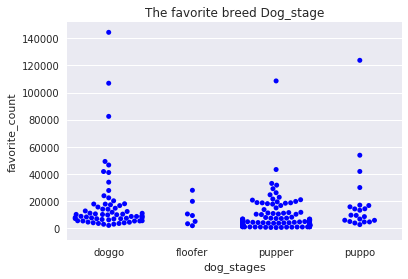

In [115]:
_ = sns.swarmplot (x = 'dog_stages', y ='favorite_count' , data = df,color = 'blue')
_= plt.title('The favorite breed Dog_stage')

The doggo is the most favorite liked dog_stage with a wide spread of favorite counts unlike floofer which has quite a minute number of favorite count

### Most Common Dog name

In [116]:
common_dog_name = df.name.value_counts().nlargest(7)

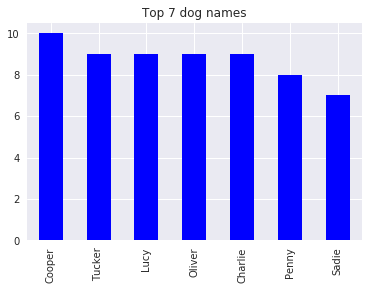

In [117]:
_ = common_dog_name.plot(kind='bar', title='Top 7 dog names',color = 'b') 

Cooper,Lucy, Turker are the most common names in the data with Copper having 10 counts, Lucy , Tucker, Oliver and Charlie 9 counts each, Sadie has least of the 7 top 10 dog names

### Is there a correlation between favorite count  and retweet count?

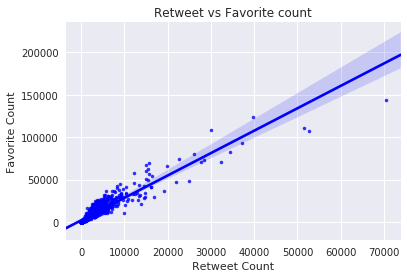

In [118]:
_= sns.regplot(x= df['retweet_count'],y = df['favorite_count'], marker = '.', color = 'b')
_ = plt.xlabel('Retweet Count')
_= plt.ylabel('Favorite Count')
_= plt.title('Retweet vs Favorite count')

From the chart above, we can see a positive correlation between Favorite count and Retweet count.

### what source has the highest count?

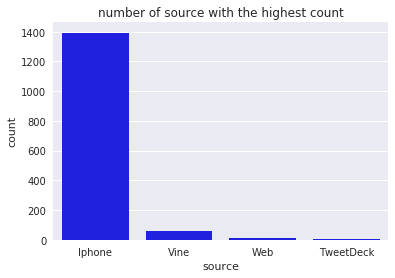

In [119]:
sns.set()
ax = sns.countplot(x=df['source'], data = df,color ='b')
_ = ax.set_xticklabels(['Iphone','Vine','Web', 'TweetDeck'])
_= plt.title('number of source with the highest count')


From the above chart, the iphone has the highest tweet and the TweetDeck has the least

### What dog_stage had the highest count?

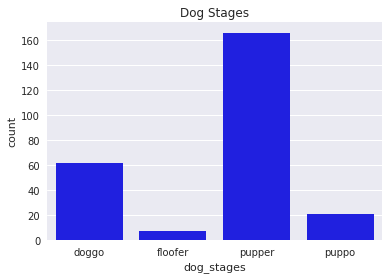

In [120]:
_ = sns.countplot(x= df['dog_stages'], data = df,color = 'b')
_ = plt.title("Dog Stages")

Most dogs were classified as  pupper, which is a smaller and usually younger type of dogs. But the data for the dog stages is incomplete so we cannot acertain the accuracy of this.

### Top 10 Favorite Dog breed

In [121]:
common_dog_breed = df.predictions.value_counts().nlargest(10)

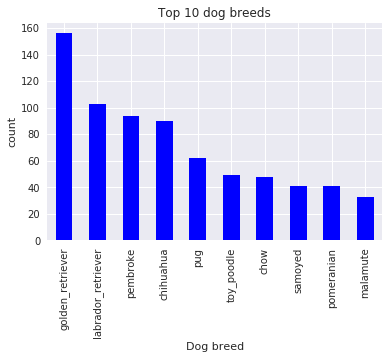

In [122]:
_ = common_dog_breed.plot(kind='bar', title='Top 10 dog breeds',color ='b') 
_=plt.xlabel('Dog breed')
_= plt.ylabel('count')
_ = plt.title('Top 10 dog breeds')

The golden_retriver is the most common dog breed with 158 counts next to the golden_retriever is the labrador_retrieverat aboout 105  the rest of the dog breeds are below 100 in counts 

Top 10 favorite dog over the years

In [123]:
df['year'].value_counts()

2016    837
2015    507
2017    314
Name: year, dtype: int64

From the above Year 2016 has the  highest value counts compared to the rest of the years

In [124]:
df['month']= df['timestamp'].dt.month_name()

In [125]:
 df['month'].value_counts()

December     334
November     269
January      197
February     152
March        146
July         123
June         108
April         83
May           83
October       60
September     56
August        47
Name: month, dtype: int64

The month of December has the highest number of likes and retweets in our dataset while August has the least count 